### Key Components

#### Data Inputs:

**Sandblasting Conditions:**
- **Angle of Sandblasting (degrees):** The angle at which sandblasting is performed.
- **Pressure of Sandblasting (bar):** The pressure applied during sandblasting.

**Acid Etching Conditions:**
- **Temperature of Acid Etching (°C):** The temperature at which acid etching is conducted.
- **Time of Acid Etching (minutes):** The duration for which acid etching is performed.

**Anodizing Conditions:**
- **Voltage of Anodizing (V):** The voltage used during anodizing.
- **Time of Anodizing (minutes):** The time duration for the anodizing process.

#### Prediction Metrics:

**Average Surface Roughness (Sa):**
- **Definition:** A critical metric for implant performance, measured in micrometers (µm).
- **Validation Range:** Predict only if the surface roughness falls within the range 1.5μm < Sa <2.5μm.
- **Action:** If the predicted Sa falls outside this range, set the "Cell Viability (%)" prediction to 0 (indicating failure).

**Cell Viability (%):**
- **Definition:** Indicator of the biocompatibility of the implant surface, impacting osseointegration, expressed as a percentage.
- **Threshold for Validity:** Predictions are valid only if Cell Viability Cell Viability > 90 .
- **Binary Indicator:**
  - **1 (Passed):** Valid   (Cell Viability > 90) .
  - **0 (Failed):** Invalid (Cell Viability ≤ 90 ).

### Procedure for Predictions:

**Predict Surface Roughness (Sa):**
1. Input the conditions into the model.
2. Obtain the predicted Sa value.

**Evaluate Surface Roughness (Sa):**
1. **Check Validity:** Ensure the predicted Sa falls within the range 1.5μm < Sa <2.5μm.
   - **Action if Valid:** Proceed to predict "Cell Viability (%)".
   - **Action if Invalid:** Set "Cell Viability (%)" to 0.

**Predict Cell Viability (%):**
1. If the predicted Sa is valid, use the same conditions to predict "Cell Viability (%)".

**Evaluate Cell Viability (%):**
1. **Check Validity:** Ensure the predicted Cell Viability \(> 90%\).
2. **Binary Indicator:**
   - **1 (Passed):** If (Cell Viability > 90) .
   - **0 (Failed):** If (Cell Viability ≤ 90 ).



### Dental_Implant_Sandblasting Project

##### **1. Introduction**
- **Objective:** Develop an end-to-end machine learning system to predict optimal sandblasting conditions and performance metrics (surface roughness and cell viability) for dental implants.
- **Approach:** Experiment with different machine learning models and hyperparameters to identify the best predictive model.

##### **2. Data Loading and Exploration**
- **Steps:**
  - Load the dataset containing sandblasting, acid etching, and anodizing conditions along with measured surface roughness and cell viability.
  - Explore the dataset to understand the distribution, patterns, and relationships between features.

##### **3. Data Preprocessing**
- **Steps:**
  - Handle missing values through imputation or removal.
  - Normalize or standardize numerical features to ensure uniform scaling.
  - Encode categorical features, if any, using techniques such as one-hot encoding.

##### **4. Feature Engineering**
- **Steps:**
  - Create new features from existing data that may capture relevant information.
  - Construct interaction terms between different features to enhance model expressiveness.
  - Perform feature selection to retain only the most relevant features.

##### **5. Model Training**
- **Steps:**
  - Split the dataset into training and validation sets.
  - Train various machine learning models (e.g., Linear Regression, Decision Trees, Random Forests, Gradient Boosting) on the training data.
  - Use cross-validation to evaluate model performance and avoid overfitting.

##### **6. Hyperparameter Tuning**
- **Steps:**
  - Use techniques such as Grid Search or Random Search to optimize hyperparameters for the chosen models.
  - Evaluate the models with tuned hyperparameters on the validation set.

##### **7. Model Evaluation**
- **Steps:**
  - Evaluate model performance using metrics such as Mean Absolute Error (MAE) for surface roughness and accuracy or F1-score for cell viability.
  - Analyze model results and compare different models to determine the best performer.

#### **8. Predictions**
- **Steps:**
  - Implement a prediction function to calculate both surface roughness and cell viability based on input conditions.
  - Validate predictions:

    **Surface Roughness (Sa):**
    - Ensure predicted surface roughness falls within the range 1.5μm < Sa < 2.5μm .
    - **Check Validity:**
      - If valid, proceed to predict cell viability.
      - If invalid, set Cell Viability (%) to 0 and mark as red.

    **Cell Viability (%):**
    - If the predicted Sa is valid, use the same conditions to predict Cell Viability (%).
    - **Check Validity:**
      - Use color coding to mark predictions as valid or invalid based on cell viability threshold (90%).
      - Green: If Cell Viability > 90% (valid).
      - Red: If Cell Viability ≤ 90%   (invalid).

##### **9. Feature Importance**
- **Steps:**
  - Conduct feature importance analysis to understand the contribution of each feature to the model's predictions.
  - Use methods such as feature importance scores from tree-based models or coefficients from linear models.

In [1]:
import os

# Check current working directory
print("Current working directory:", os.getcwd())


Current working directory: d:\iNeuron_Projects\End_to_End_ML_Dental_Implant_Sandblasting\research


In [2]:
os.chdir("../")

In [3]:
%pwd

'd:\\iNeuron_Projects\\End_to_End_ML_Dental_Implant_Sandblasting'

### 2. Data Loading and Exploration :

First few rows of the dataset:


,Angle of Sandblasting,Pressure of Sandblasting (bar),Temperture of Acid Etching,Time of Acid Etching (min),Voltage of Anodizing (v),Time of Anodizing (min),(Sa) Average of Surface roughness (micrometer),Cell Viability (%),"Result (1=Passed, 0=Failed)"
0,30,3,25,3,80,1,0.746,75,0
1,40,3,25,3,80,1,0.813,70,0
2,50,3,25,3,80,1,0.952,65,0
3,30,3,25,6,80,1,0.950,77,0
4,30,3,25,9,80,1,1.020,75,0



Data shape: (102, 9)

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 9 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Angle of Sandblasting                           102 non-null    int64  
 1   Pressure of Sandblasting (bar)                  102 non-null    int64  
 2   Temperture of Acid Etching                      102 non-null    int64  
 3   Time of Acid Etching (min)                      102 non-null    int64  
 4   Voltage of Anodizing (v)                        102 non-null    int64  
 5   Time of  Anodizing (min)                        102 non-null    int64  
 6   (Sa) Average of Surface roughness (micrometer)  102 non-null    float64
 7   Cell Viability (%)                              102 non-null    int64  
 8   Result (1=Passed, 0=Failed)                     102 non-null    int64  
dtypes: float64

,Angle of Sandblasting,Pressure of Sandblasting (bar),Temperture of Acid Etching,Time of Acid Etching (min),Voltage of Anodizing (v),Time of Anodizing (min),(Sa) Average of Surface roughness (micrometer),Cell Viability (%),"Result (1=Passed, 0=Failed)"
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,34.411765,4.029412,48.529412,5.852941,100.392157,5.764706,1.981971,75.696078,0.039216
std,6.975705,0.849646,22.477582,2.326758,16.645492,3.640195,0.635637,7.299517,0.195066
min,30.000000,3.000000,25.000000,3.000000,80.000000,1.000000,0.746000,62.000000,0.000000
25%,30.000000,3.000000,25.000000,3.000000,80.000000,1.000000,1.401750,70.250000,0.000000
50%,30.000000,4.000000,50.000000,6.000000,100.000000,5.000000,2.091500,75.000000,0.000000
75%,40.000000,5.000000,75.000000,9.000000,120.000000,10.000000,2.556000,80.000000,0.000000
max,50.000000,5.000000,75.000000,9.000000,120.000000,10.000000,3.497000,96.000000,1.000000



Missing values by column:
Angle of Sandblasting                             0
Pressure of Sandblasting (bar)                    0
Temperture of Acid Etching                        0
Time of Acid Etching (min)                        0
Voltage of Anodizing (v)                          0
Time of  Anodizing (min)                          0
(Sa) Average of Surface roughness (micrometer)    0
Cell Viability (%)                                0
Result (1=Passed, 0=Failed)                       0
dtype: int64

Data types after cleaning:
Angle of Sandblasting                               int64
Pressure of Sandblasting (bar)                      int64
Temperture of Acid Etching                          int64
Time of Acid Etching (min)                          int64
Voltage of Anodizing (v)                            int64
Time of  Anodizing (min)                            int64
(Sa) Average of Surface roughness (micrometer)    float64
Cell Viability (%)                                  int64


,Angle of Sandblasting,Pressure of Sandblasting (bar),Temperture of Acid Etching,Time of Acid Etching (min),Voltage of Anodizing (v),Time of Anodizing (min),(Sa) Average of Surface roughness (micrometer),Cell Viability (%),"Result (1=Passed, 0=Failed)"
61,40,3,75,9,100,10,1.703,96,1


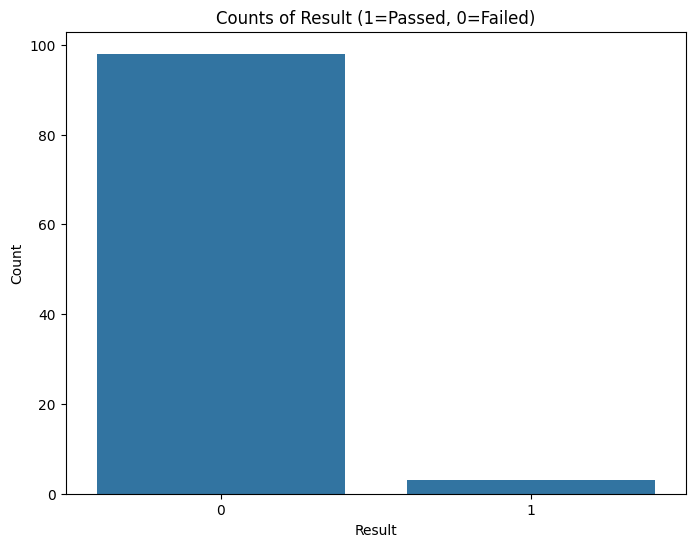

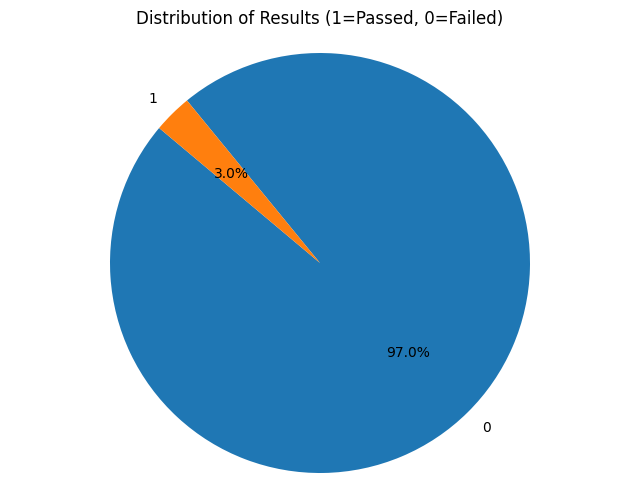

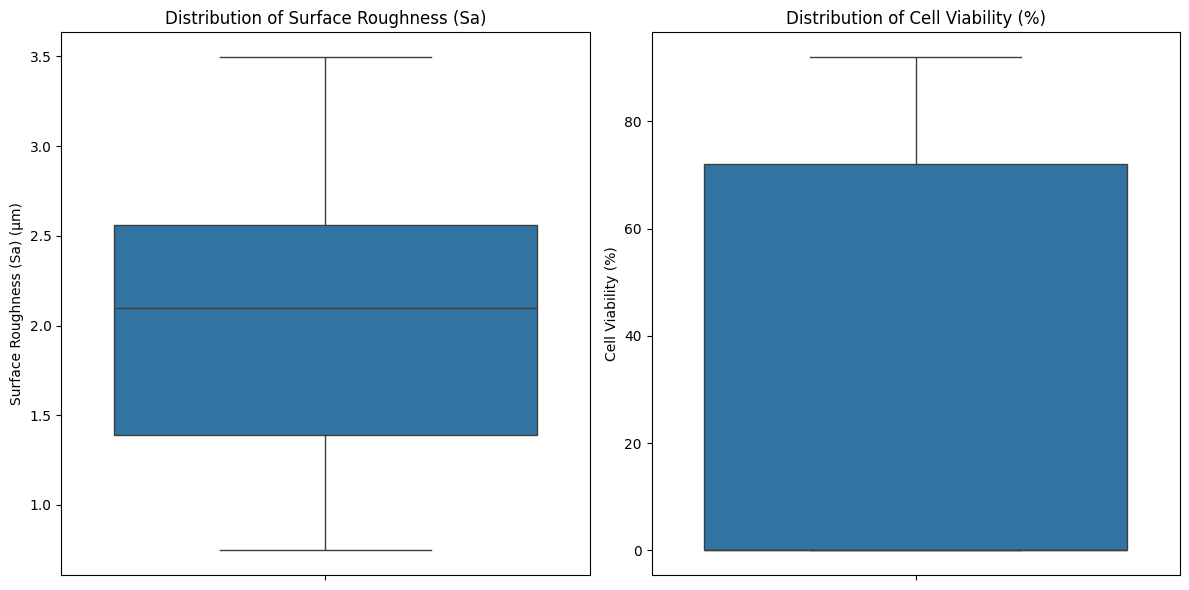

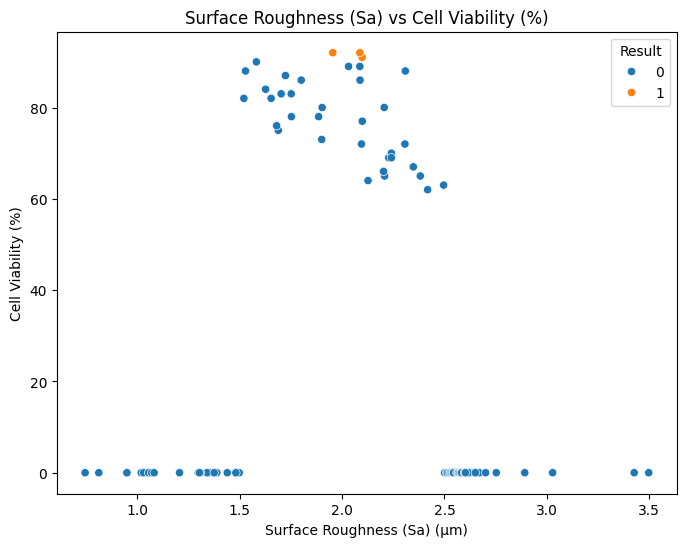

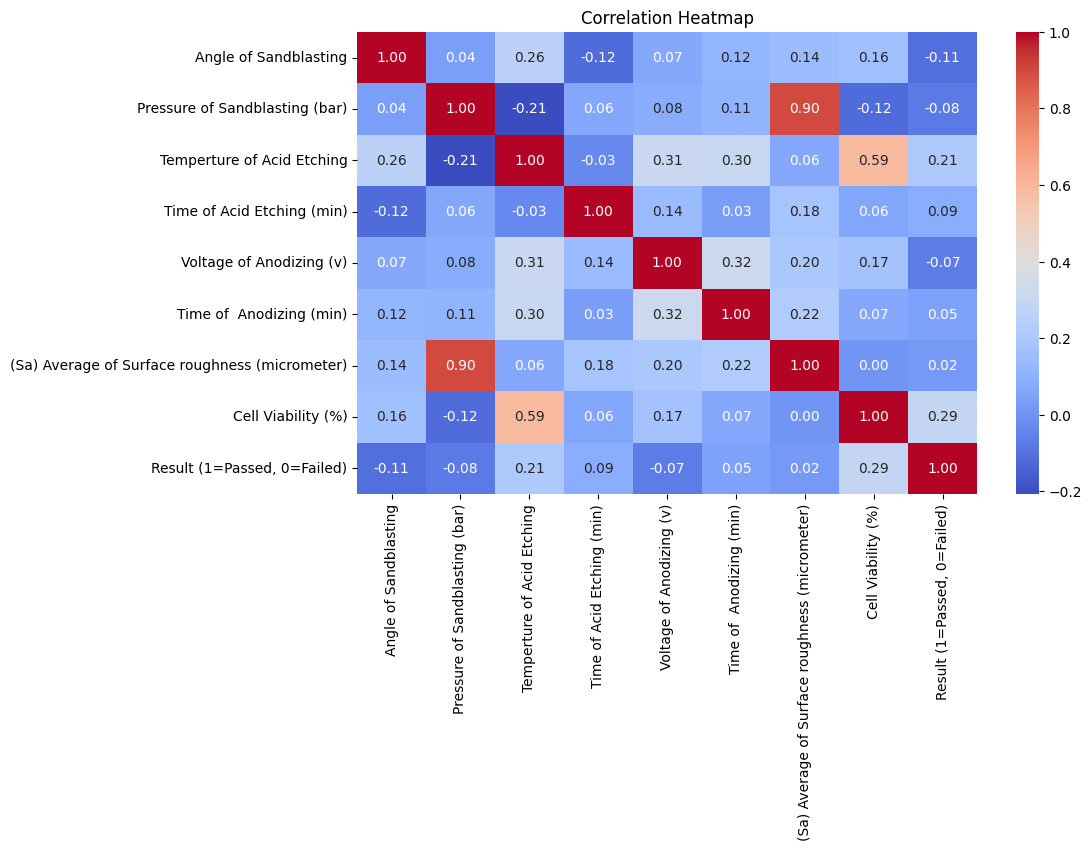

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
DATA_PATH = 'data/Sandblasting-Condition.csv'
data = pd.read_csv(DATA_PATH)

# Display first few rows of the dataset
print("First few rows of the dataset:")
display(data.head())

# Data shape
print(f"\nData shape: {data.shape}")

# Data types and basic info
print("\nData info:")
data.info()

# Display data types of each column
print("\nData types:")
print(data.dtypes)

# Summary statistics
print("\nSummary statistics:")
display(data.describe(include='all'))

# Check for missing values
print("\nMissing values by column:")
print(data.isnull().sum())

# Handling non-numeric values
# Convert appropriate columns to numeric, forcing errors to NaN
cols_to_convert = [
    'Pressure of Sandblasting (bar)',
    'Temperture of Acid Etching',
    'Time of Acid Etching (min)',
    'Voltage of Anodizing (v)',
    'Time of  Anodizing (min)',
    '(Sa) Average of Surface roughness (micrometer)',
    'Cell Viability (%)'
]

data[cols_to_convert] = data[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values in these columns
data = data.dropna(subset=cols_to_convert)

# Confirm that non-numeric values are handled
print("\nData types after cleaning:")
print(data.dtypes)

# Filter data according to the given validation ranges
valid_data = data[(data['(Sa) Average of Surface roughness (micrometer)'] > 1.5) &
                  (data['(Sa) Average of Surface roughness (micrometer)'] < 2.5)]

# Set "Cell Viability (%)" to 0 where Sa is outside the valid range
data.loc[~data.index.isin(valid_data.index), 'Cell Viability (%)'] = 0

# Set Result (1=Passed, 0=Failed) based on Cell Viability threshold
data['Result (1=Passed, 0=Failed)'] = np.where(data['Cell Viability (%)'] > 90, 1, 0)

# Outlier analysis for Cell Viability
# Define an outlier threshold for Cell Viability
cv_threshold = data['Cell Viability (%)'].quantile(0.99)

# Identify outliers
outliers = data[data['Cell Viability (%)'] > cv_threshold]
print("\nOutliers in Cell Viability (Top 1%):")
display(outliers)

# Remove outliers from the dataset
data_cleaned = data[data['Cell Viability (%)'] <= cv_threshold]

# Exploratory Data Analysis (EDA)

# 1. Bar Chart: Counts of Result
plt.figure(figsize=(8, 6))
sns.countplot(x='Result (1=Passed, 0=Failed)', data=data_cleaned)
plt.title("Counts of Result (1=Passed, 0=Failed)")
plt.xlabel("Result")
plt.ylabel("Count")
plt.show()

# 2. Pie Chart: Distribution of Results
result_counts = data_cleaned['Result (1=Passed, 0=Failed)'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Results (1=Passed, 0=Failed)")
plt.axis('equal')
plt.show()

# 3. Box Plot: Distribution of Surface Roughness (Sa) and Cell Viability (%)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y='(Sa) Average of Surface roughness (micrometer)', data=data_cleaned)
plt.title("Distribution of Surface Roughness (Sa)")
plt.ylabel("Surface Roughness (Sa) (µm)")

plt.subplot(1, 2, 2)
sns.boxplot(y='Cell Viability (%)', data=data_cleaned)
plt.title("Distribution of Cell Viability (%)")
plt.ylabel("Cell Viability (%)")

plt.tight_layout()
plt.show()

# 4. Scatter Plot: Surface Roughness (Sa) vs Cell Viability
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_cleaned['(Sa) Average of Surface roughness (micrometer)'], 
                y=data_cleaned['Cell Viability (%)'], hue=data_cleaned['Result (1=Passed, 0=Failed)'])
plt.title("Surface Roughness (Sa) vs Cell Viability (%)")
plt.xlabel("Surface Roughness (Sa) (µm)")
plt.ylabel("Cell Viability (%)")
plt.legend(title='Result')
plt.show()

# 5. Correlation Heatmap: Focus on Sa and Cell Viability
plt.figure(figsize=(10, 6))
sns.heatmap(data_cleaned.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()




### 3. Data Preprocessing
- The data preprocessing stage is crucial to ensure the quality and readiness of the data for model training. This includes handling missing values, normalizing or standardizing features, and splitting the data into training and testing sets.

Missing values:
 Angle of Sandblasting                             0
Pressure of Sandblasting (bar)                    0
Temperture of Acid Etching                        0
Time of Acid Etching (min)                        0
Voltage of Anodizing (v)                          0
Time of  Anodizing (min)                          0
(Sa) Average of Surface roughness (micrometer)    0
Cell Viability (%)                                0
Result (1=Passed, 0=Failed)                       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 9 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Angle of Sandblasting                           102 non-null    int64  
 1   Pressure of Sandblasting (bar)                  102 non-null    int64  
 2   Temperture of Acid Etching                      102 non-null    int64  
 3   Time of 

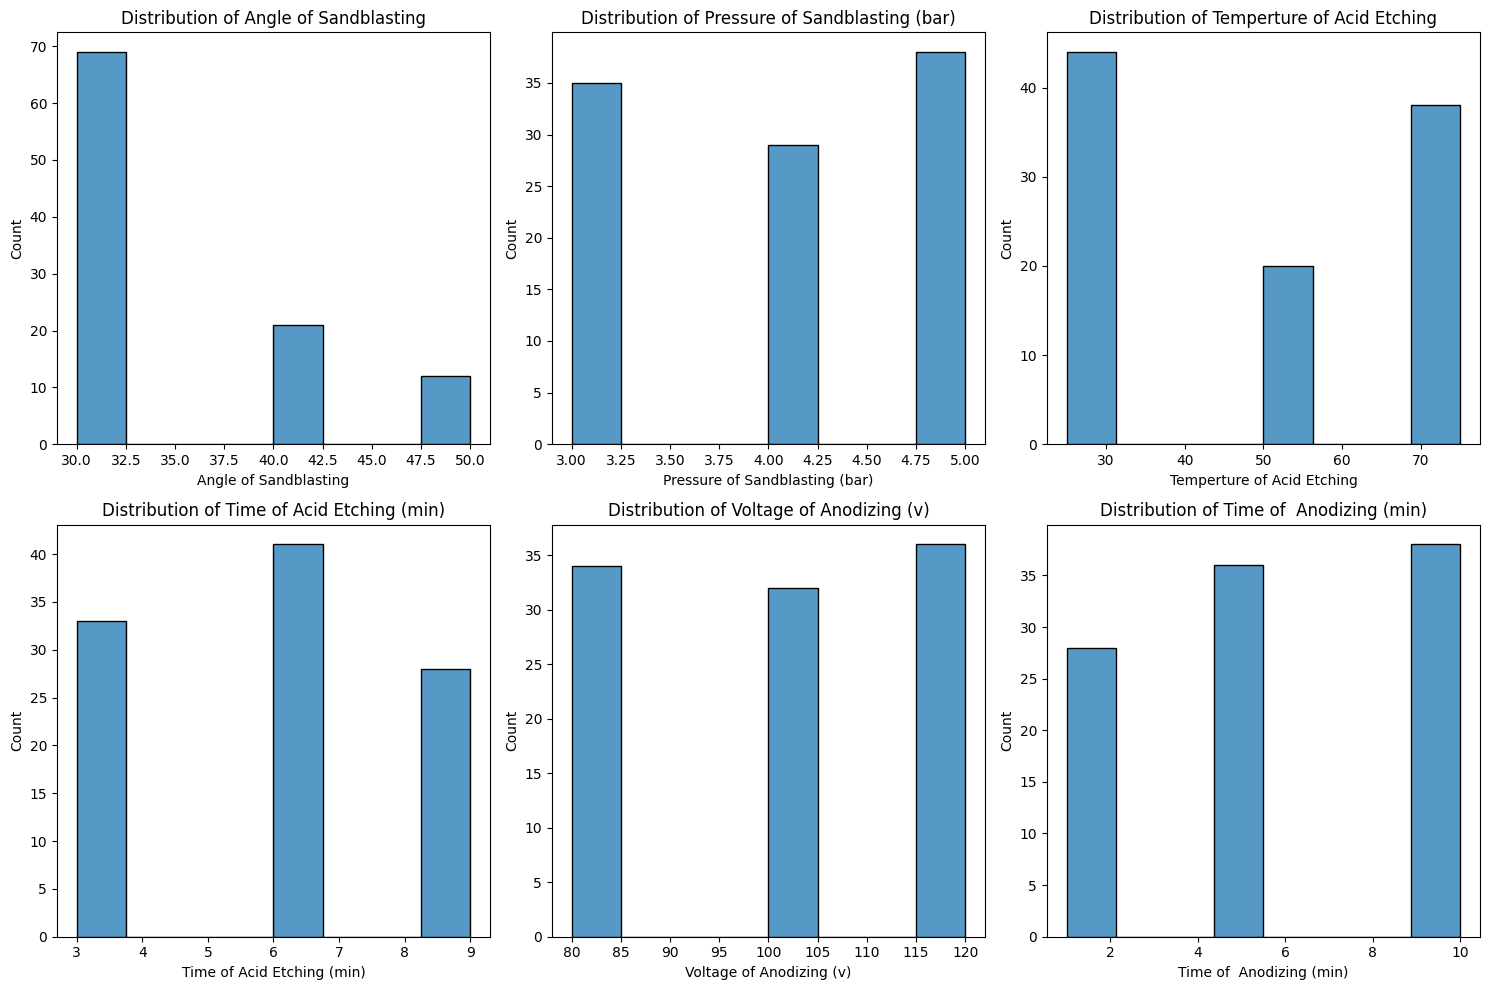

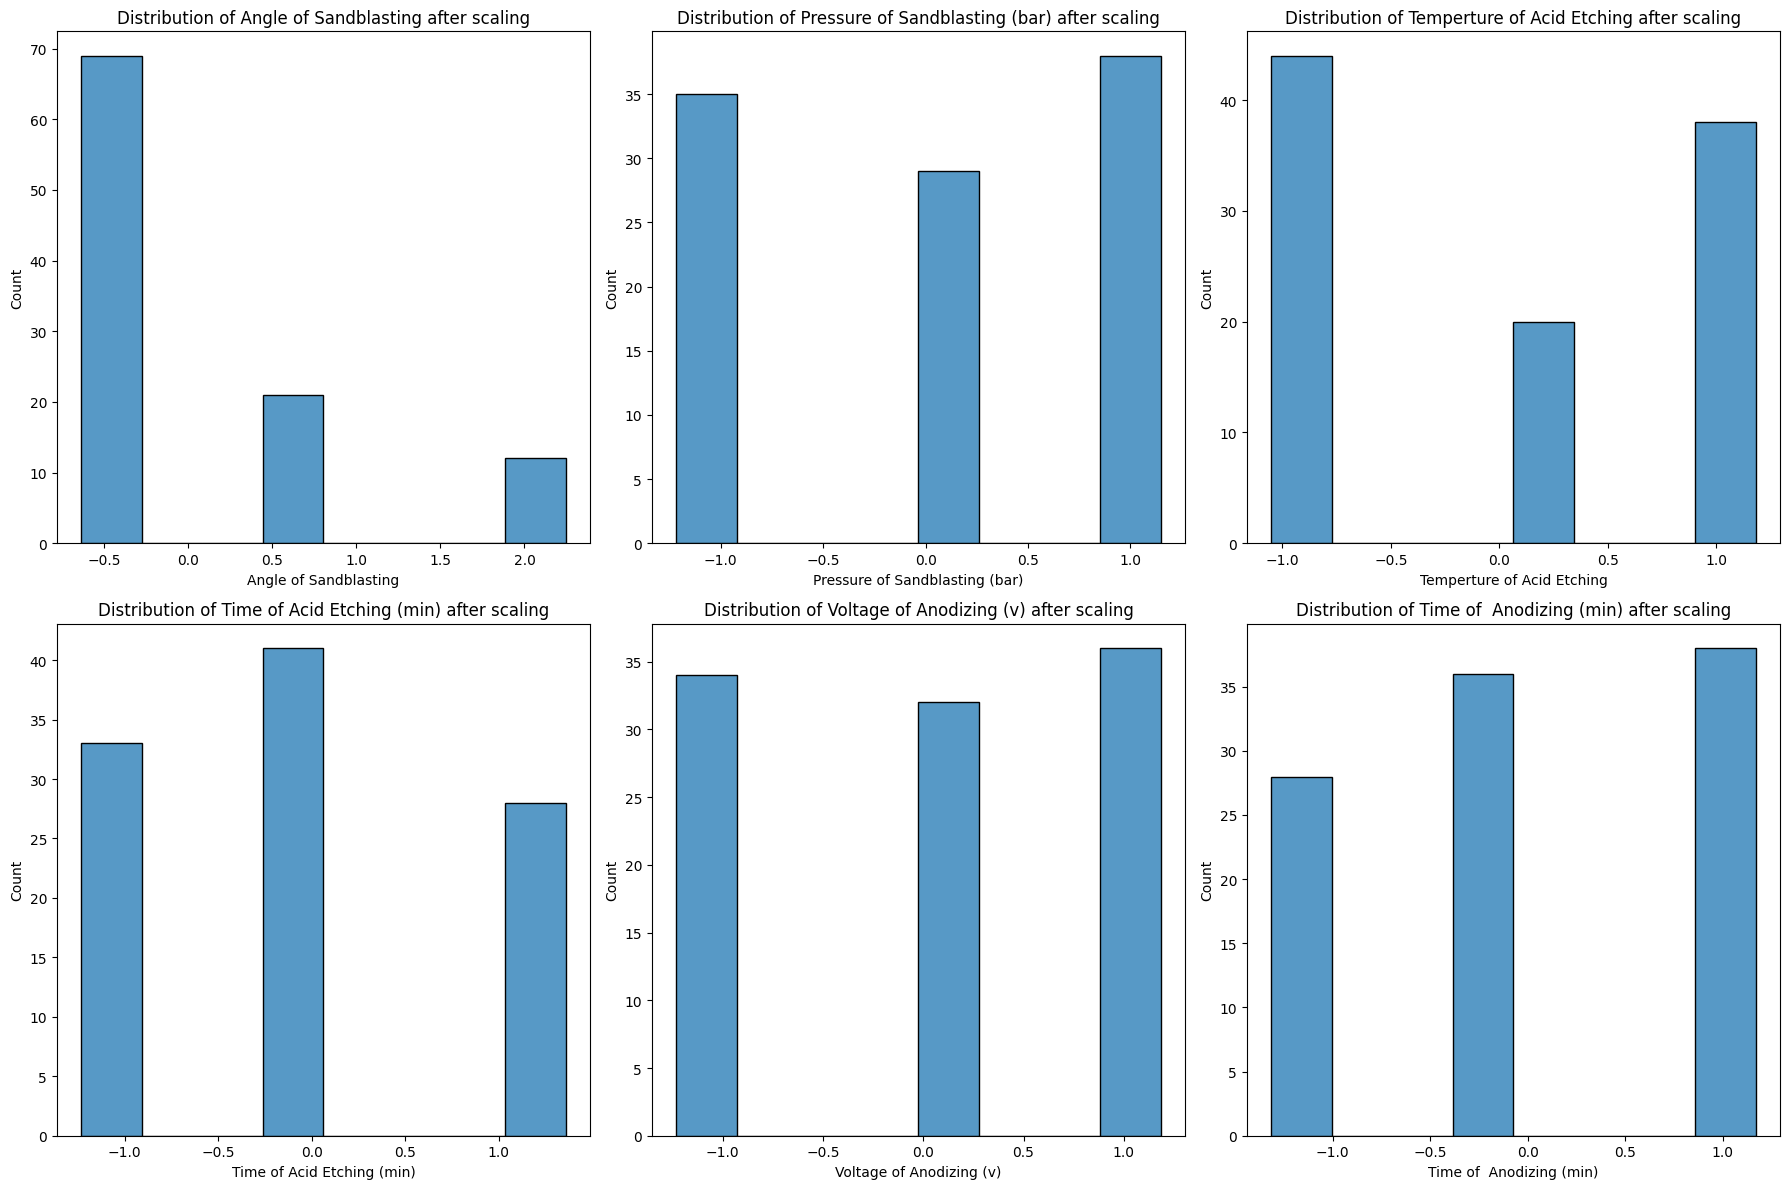

Training set size for Surface Roughness (Sa): (81, 6)
Testing set size for Surface Roughness (Sa): (21, 6)
Training set size for Cell Viability (CV): (81,)
Testing set size for Cell Viability (CV): (21,)


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
DATA_PATH = 'data/Sandblasting-Condition.csv'
data = pd.read_csv(DATA_PATH)

# Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

# Convert appropriate columns to numeric, forcing errors to NaN
cols_to_convert = [
    'Angle of Sandblasting', 
    'Pressure of Sandblasting (bar)', 
    'Temperture of Acid Etching',
    'Time of Acid Etching (min)',
    'Voltage of Anodizing (v)', 
    'Time of  Anodizing (min)', 
    '(Sa) Average of Surface roughness (micrometer)', 
    'Cell Viability (%)'
]

data[cols_to_convert] = data[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Impute missing values using the mean for numeric columns
data_imputed = data.copy()
numeric_cols = data.select_dtypes(include=[np.number]).columns
data_imputed[numeric_cols] = data_imputed[numeric_cols].fillna(data_imputed[numeric_cols].mean())

# Verify data after imputation
print("Data after imputing missing values:\n", data_imputed.info())

# Ensure that the dataset is not empty after imputation
if data_imputed.empty:
    raise ValueError("Dataset is empty after imputing missing values.")

# Filter data according to the given validation ranges for Surface Roughness (Sa)
valid_data = data_imputed[
    (data_imputed['(Sa) Average of Surface roughness (micrometer)'] > 1.5) & 
    (data_imputed['(Sa) Average of Surface roughness (micrometer)'] < 2.5)
]

# Set "Cell Viability (%)" to 0 where Sa is outside the valid range
data_imputed.loc[~data_imputed.index.isin(valid_data.index), 'Cell Viability (%)'] = 0

# Separate features and target variables
feature_columns = [
    'Angle of Sandblasting', 
    'Pressure of Sandblasting (bar)', 
    'Temperture of Acid Etching', 
    'Time of Acid Etching (min)', 
    'Voltage of Anodizing (v)', 
    'Time of  Anodizing (min)'
]
target_column_sa = '(Sa) Average of Surface roughness (micrometer)'
target_column_cv = 'Cell Viability (%)'

X = data_imputed[feature_columns]
y_sa = data_imputed[target_column_sa]
y_cv = data_imputed[target_column_cv]

# Handle outliers in Cell Viability
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return np.clip(series, lower_bound, upper_bound)

y_cv_capped = cap_outliers(y_cv)

# Visualize distributions before scaling (Using Histograms)
plt.figure(figsize=(15, 10))
for i, column in enumerate(feature_columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(X[column], kde=False)  # kde=False to remove the line
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Normalize or standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualize distributions after scaling (Using Histograms)
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_columns)

# Update for handling a variable number of plots
num_features = len(feature_columns)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

axes = axes.flatten()  # Flatten axes array to easily iterate over it

for i, column in enumerate(X_scaled_df.columns):
    sns.histplot(X_scaled_df[column], kde=False, ax=axes[i])  # kde=False to remove the line
    axes[i].set_title(f'Distribution of {column} after scaling')

plt.tight_layout()
plt.show()

# Split the data into training and testing sets for Surface Roughness (Sa) and Cell Viability (CV)
X_train, X_test, y_sa_train, y_sa_test = train_test_split(X_scaled, y_sa, test_size=0.2, random_state=42)
_, _, y_cv_train, y_cv_test = train_test_split(X_scaled, y_cv_capped, test_size=0.2, random_state=42)

print("Training set size for Surface Roughness (Sa):", X_train.shape)
print("Testing set size for Surface Roughness (Sa):", X_test.shape)
print("Training set size for Cell Viability (CV):", y_cv_train.shape)
print("Testing set size for Cell Viability (CV):", y_cv_test.shape)

# Check for any inconsistencies in the data split
if X_train.shape[0] != y_sa_train.shape[0] or X_train.shape[0] != y_cv_train.shape[0]:
    raise ValueError("Mismatch in the number of training samples between features and targets.")
if X_test.shape[0] != y_sa_test.shape[0] or X_test.shape[0] != y_cv_test.shape[0]:
    raise ValueError("Mismatch in the number of testing samples between features and targets.")


### 4. Feature Engineering
- Creating new features from the existing ones to improve the performance of machine learning models. This can include interaction terms, polynomial features, and other derived metrics that may capture additional information

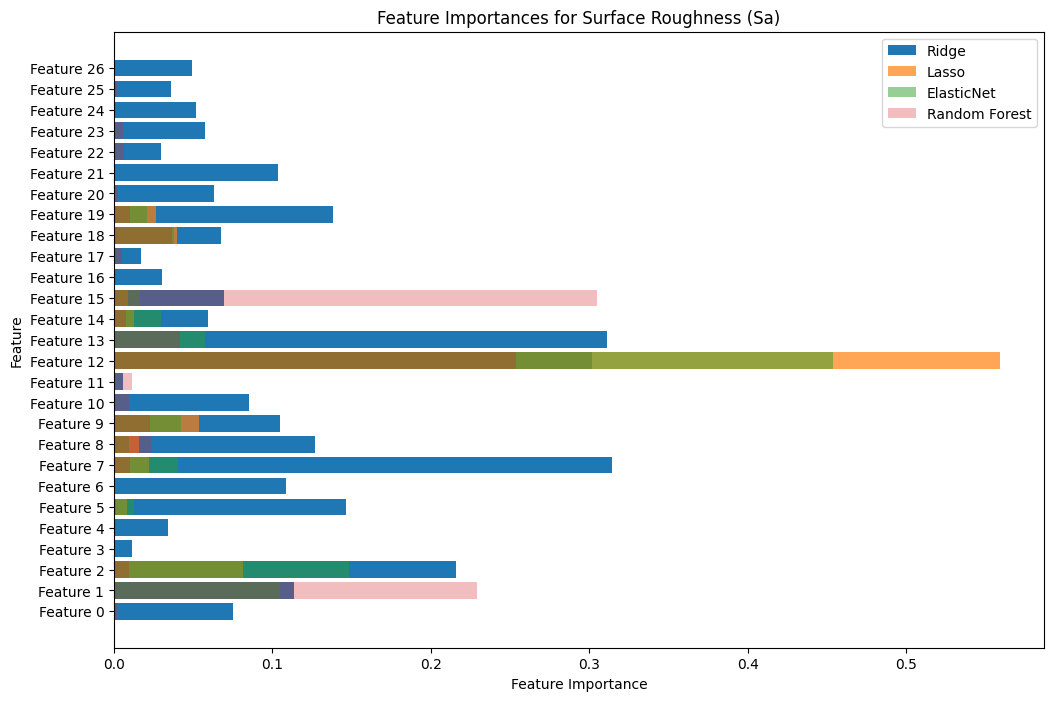

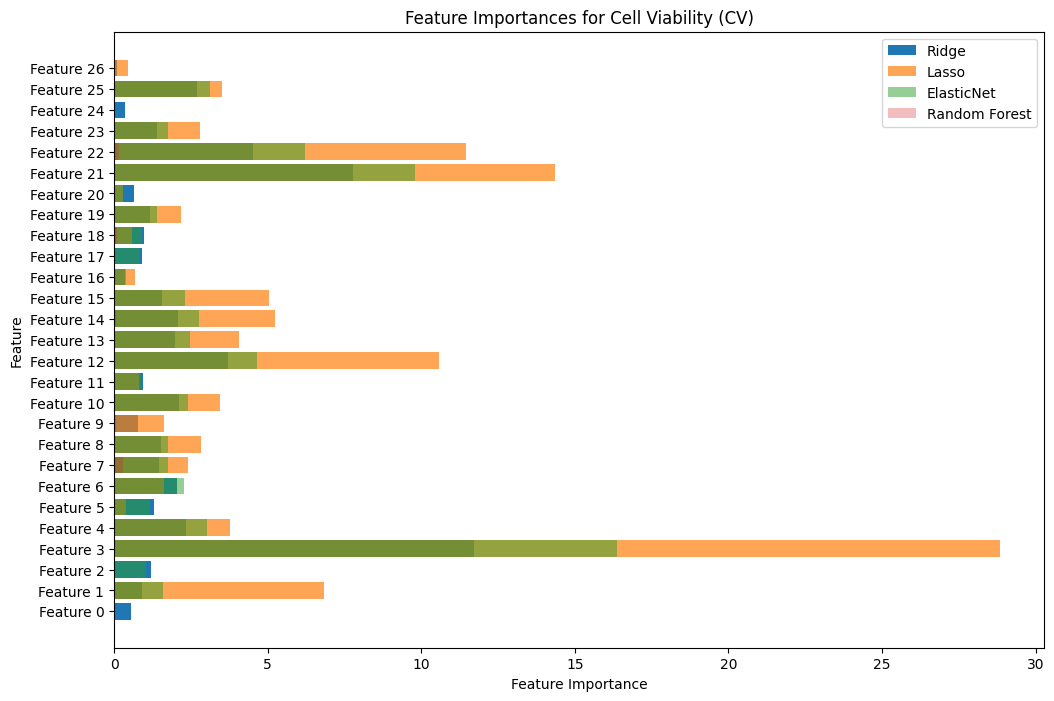

Number of features selected for Sa: 8
Number of features selected for CV: 23
Training set size after feature selection for Sa: (81, 8)
Testing set size after feature selection for Sa: (21, 8)
Training set size after feature selection for CV: (81, 23)
Testing set size after feature selection for CV: (21, 23)


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

# Load the dataset
DATA_PATH = 'data/Sandblasting-Condition.csv'
data = pd.read_csv(DATA_PATH)

# Handle missing values
cols_to_convert = [
    'Angle of Sandblasting', 
    'Pressure of Sandblasting (bar)', 
    'Temperture of Acid Etching',
    'Time of Acid Etching (min)',
    'Voltage of Anodizing (v)', 
    'Time of  Anodizing (min)', 
    '(Sa) Average of Surface roughness (micrometer)', 
    'Cell Viability (%)'
]

data[cols_to_convert] = data[cols_to_convert].apply(pd.to_numeric, errors='coerce')
numeric_cols = data.select_dtypes(include=[np.number]).columns
data_imputed = data.copy()
data_imputed[numeric_cols] = data_imputed[numeric_cols].fillna(data_imputed[numeric_cols].mean())

# Define feature and target columns
feature_columns = [
    'Angle of Sandblasting', 
    'Pressure of Sandblasting (bar)', 
    'Temperture of Acid Etching', 
    'Time of Acid Etching (min)', 
    'Voltage of Anodizing (v)', 
    'Time of  Anodizing (min)'
]
target_column_sa = '(Sa) Average of Surface roughness (micrometer)'
target_column_cv = 'Cell Viability (%)'

X = data_imputed[feature_columns]
y_sa = data_imputed[target_column_sa]
y_cv = data_imputed[target_column_cv]

# Apply PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
X_poly = poly.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Feature Selection using Ridge, Lasso, ElasticNet, and RandomForest

# Ridge
ridge_sa = Ridge(alpha=1.0)
ridge_sa.fit(X_scaled, y_sa)
coef_ridge_sa = ridge_sa.coef_

ridge_cv = Ridge(alpha=1.0)
ridge_cv.fit(X_scaled, y_cv)
coef_ridge_cv = ridge_cv.coef_

# Lasso
lasso_sa = Lasso(alpha=0.01, max_iter=10000)
lasso_sa.fit(X_scaled, y_sa)
coef_lasso_sa = lasso_sa.coef_

lasso_cv = Lasso(alpha=0.01, max_iter=10000)
lasso_cv.fit(X_scaled, y_cv)
coef_lasso_cv = lasso_cv.coef_

# ElasticNet
elasticnet_sa = ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=10000)
elasticnet_sa.fit(X_scaled, y_sa)
coef_elasticnet_sa = elasticnet_sa.coef_

elasticnet_cv = ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=10000)
elasticnet_cv.fit(X_scaled, y_cv)
coef_elasticnet_cv = elasticnet_cv.coef_

# Random Forest
rf_sa = RandomForestRegressor(n_estimators=100, random_state=42)
rf_sa.fit(X_scaled, y_sa)
importances_rf_sa = rf_sa.feature_importances_

rf_cv = RandomForestRegressor(n_estimators=100, random_state=42)
rf_cv.fit(X_scaled, y_cv)
importances_rf_cv = rf_cv.feature_importances_

# Plotting Feature Importances for Sa and CV

# For Sa
plt.figure(figsize=(12, 8))
plt.barh([f'Feature {i}' for i in range(len(coef_ridge_sa))], np.abs(coef_ridge_sa), label='Ridge')
plt.barh([f'Feature {i}' for i in range(len(coef_lasso_sa))], np.abs(coef_lasso_sa), label='Lasso', alpha=0.7)
plt.barh([f'Feature {i}' for i in range(len(coef_elasticnet_sa))], np.abs(coef_elasticnet_sa), label='ElasticNet', alpha=0.5)
plt.barh([f'Feature {i}' for i in range(len(importances_rf_sa))], importances_rf_sa, label='Random Forest', alpha=0.3)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for Surface Roughness (Sa)')
plt.legend()
plt.show()

# For CV
plt.figure(figsize=(12, 8))
plt.barh([f'Feature {i}' for i in range(len(coef_ridge_cv))], np.abs(coef_ridge_cv), label='Ridge')
plt.barh([f'Feature {i}' for i in range(len(coef_lasso_cv))], np.abs(coef_lasso_cv), label='Lasso', alpha=0.7)
plt.barh([f'Feature {i}' for i in range(len(coef_elasticnet_cv))], np.abs(coef_elasticnet_cv), label='ElasticNet', alpha=0.5)
plt.barh([f'Feature {i}' for i in range(len(importances_rf_cv))], importances_rf_cv, label='Random Forest', alpha=0.3)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for Cell Viability (CV)')
plt.legend()
plt.show()

# Selecting the top features based on Lasso (as Lasso inherently performs feature selection)
threshold = 0.01  # You may need to adjust this threshold
selected_features_sa = np.where(np.abs(coef_lasso_sa) > threshold)[0]
selected_features_cv = np.where(np.abs(coef_lasso_cv) > threshold)[0]

X_selected_sa = X_scaled[:, selected_features_sa]
X_selected_cv = X_scaled[:, selected_features_cv]

print(f"Number of features selected for Sa: {X_selected_sa.shape[1]}")
print(f"Number of features selected for CV: {X_selected_cv.shape[1]}")

# Split the data into training and testing sets
X_train_sa, X_test_sa, y_sa_train, y_sa_test = train_test_split(X_selected_sa, y_sa, test_size=0.2, random_state=42)
X_train_cv, X_test_cv, y_cv_train, y_cv_test = train_test_split(X_selected_cv, y_cv, test_size=0.2, random_state=42)

print("Training set size after feature selection for Sa:", X_train_sa.shape)
print("Testing set size after feature selection for Sa:", X_test_sa.shape)
print("Training set size after feature selection for CV:", X_train_cv.shape)
print("Testing set size after feature selection for CV:", X_test_cv.shape)

# Ensure consistency in data splits
if X_train_sa.shape[0] != y_sa_train.shape[0] or X_train_cv.shape[0] != y_cv_train.shape[0]:
    raise ValueError("Mismatch in the number of training samples between features and targets.")
if X_test_sa.shape[0] != y_sa_test.shape[0] or X_test_cv.shape[0] != y_cv_test.shape[0]:
    raise ValueError("Mismatch in the number of testing samples between features and targets.")


### 5. Model Training
- To identify the best model for predicting optimal sandblasting conditions for dental implants, we will experiment with various machine learning models. This includes Linear Regression, Random Forest, Gradient Boosting, and Neural Networks .

Training Ridge...
Ridge - MAE (Sa): 0.1568, MAE (CV): 5.4715
Training ElasticNet...
ElasticNet - MAE (Sa): 0.5371, MAE (CV): 5.1982
Training BayesianRidge...
BayesianRidge - MAE (Sa): 0.1561, MAE (CV): 5.3076
Training HuberRegressor...
HuberRegressor - MAE (Sa): 0.1478, MAE (CV): 6.5578
Training RandomForest...
RandomForest - MAE (Sa): 0.1430, MAE (CV): 4.6726
Training GradientBoosting...
GradientBoosting - MAE (Sa): 0.1407, MAE (CV): 5.1596

Model Performance:
                   MAE (Sa)  MAE (CV)
Ridge             0.156801  5.471466
ElasticNet        0.537057  5.198182
BayesianRidge     0.156127  5.307625
HuberRegressor    0.147834  6.557786
RandomForest      0.142984  4.672645
GradientBoosting  0.140718  5.159642

Best Model for Surface Roughness (Sa): GradientBoosting
Test MAE (Sa): 0.1157
Test RMSE (Sa): 0.2579
Test R2 (Sa): 0.8592
Test SMAPE (Sa): 6.0594

Best Model for Cell Viability (CV): RandomForest
Test MAE (CV): 3.7536
Test RMSE (CV): 5.5204
Test R2 (CV): 0.3945
Test SMAPE 

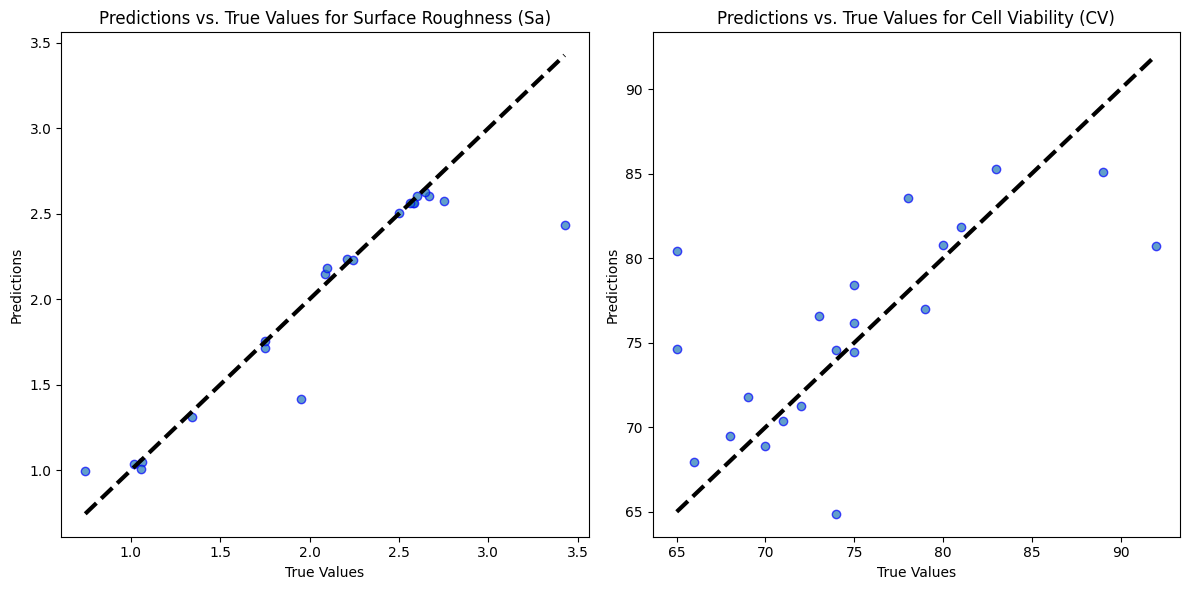

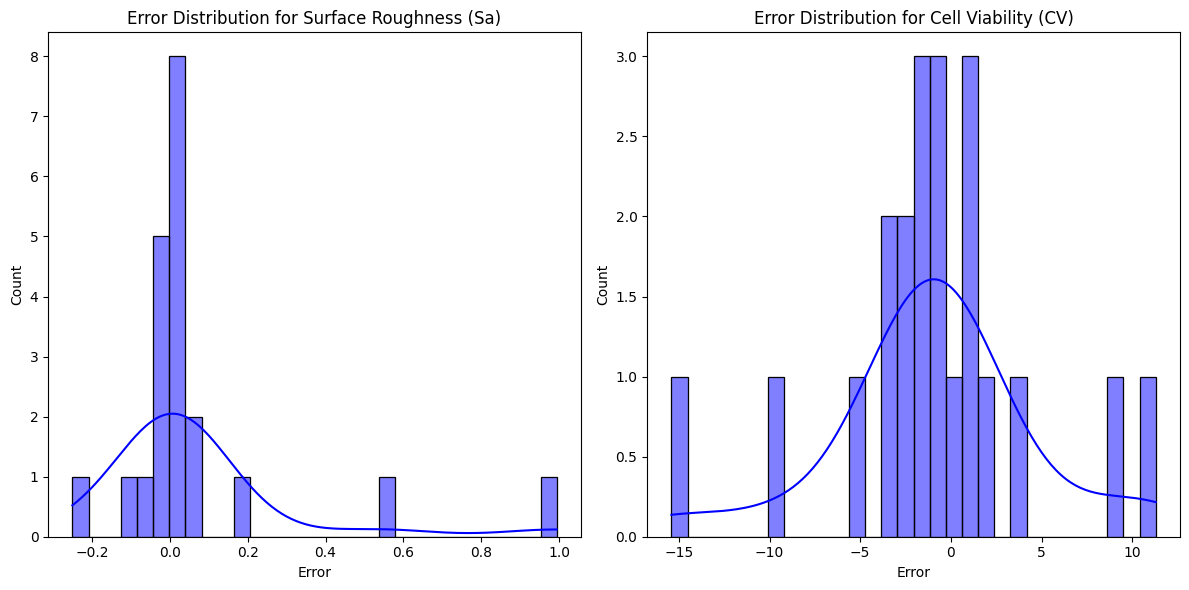

In [7]:
from sklearn.linear_model import Ridge, ElasticNet, HuberRegressor, BayesianRidge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define models with adjusted parameters
models = {
    "Ridge": Ridge(),
    "ElasticNet": ElasticNet(max_iter=10000),  # Increased max_iter for better convergence
    "BayesianRidge": BayesianRidge(),
    "HuberRegressor": HuberRegressor(max_iter=10000),  # Increased max_iter for better convergence
    "RandomForest": RandomForestRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42)
}

# Initialize dictionary to store model performance
model_performance = {}

# Define SMAPE function
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true) + 1e-10))

# Evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    # Cross-validation for Surface Roughness (Sa)
    cv_scores_sa = cross_val_score(model, X_train_sa, y_sa_train, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
    mae_sa = -cv_scores_sa.mean()
    
    # Cross-validation for Cell Viability (CV)
    cv_scores_cv = cross_val_score(model, X_train_cv, y_cv_train, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
    mae_cv = -cv_scores_cv.mean()
    
    # Store results
    model_performance[model_name] = {
        "MAE (Sa)": mae_sa,
        "MAE (CV)": mae_cv
    }
    
    print(f"{model_name} - MAE (Sa): {mae_sa:.4f}, MAE (CV): {mae_cv:.4f}")

# Convert performance to DataFrame
performance_df = pd.DataFrame(model_performance).T
print("\nModel Performance:\n", performance_df)

# Train the best model for Surface Roughness (Sa) on the entire training set and evaluate on the test set
best_model_name_sa = performance_df['MAE (Sa)'].idxmin()
best_model_sa = models[best_model_name_sa]
best_model_sa.fit(X_train_sa, y_sa_train)
y_sa_pred = best_model_sa.predict(X_test_sa)

# Evaluate the best model for Surface Roughness (Sa) on the test set
test_mae_sa = mean_absolute_error(y_sa_test, y_sa_pred)
test_rmse_sa = np.sqrt(mean_squared_error(y_sa_test, y_sa_pred))
test_r2_sa = r2_score(y_sa_test, y_sa_pred)
test_smape_sa = smape(y_sa_test, y_sa_pred)

print(f"\nBest Model for Surface Roughness (Sa): {best_model_name_sa}")
print(f"Test MAE (Sa): {test_mae_sa:.4f}")
print(f"Test RMSE (Sa): {test_rmse_sa:.4f}")
print(f"Test R2 (Sa): {test_r2_sa:.4f}")
print(f"Test SMAPE (Sa): {test_smape_sa:.4f}")

# Train the best model for Cell Viability (CV) on the entire training set and evaluate on the test set
best_model_name_cv = performance_df['MAE (CV)'].idxmin()
best_model_cv = models[best_model_name_cv]
best_model_cv.fit(X_train_cv, y_cv_train)
y_cv_pred = best_model_cv.predict(X_test_cv)

# Evaluate the best model for Cell Viability (CV) on the test set
test_mae_cv = mean_absolute_error(y_cv_test, y_cv_pred)
test_rmse_cv = np.sqrt(mean_squared_error(y_cv_test, y_cv_pred))
test_r2_cv = r2_score(y_cv_test, y_cv_pred)
test_smape_cv = smape(y_cv_test, y_cv_pred)

print(f"\nBest Model for Cell Viability (CV): {best_model_name_cv}")
print(f"Test MAE (CV): {test_mae_cv:.4f}")
print(f"Test RMSE (CV): {test_rmse_cv:.4f}")
print(f"Test R2 (CV): {test_r2_cv:.4f}")
print(f"Test SMAPE (CV): {test_smape_cv:.4f}")

# Adding Stacking Ensemble for Surface Roughness (Sa)

# Define the base models
base_models = [
    ('ridge', Ridge()),
    ('rf', RandomForestRegressor(random_state=42)),
    ('gbr', GradientBoostingRegressor(random_state=42))
]

# Define the meta-model
meta_model = Ridge()

# Create the stacking ensemble
stacking_ensemble = StackingRegressor(estimators=base_models, final_estimator=meta_model, n_jobs=-1)

# Train the stacking ensemble on Surface Roughness (Sa)
stacking_ensemble.fit(X_train_sa, y_sa_train)

# Predict on the test set
y_sa_pred_stack = stacking_ensemble.predict(X_test_sa)

# Evaluate the ensemble model
test_mae_sa_stack = mean_absolute_error(y_sa_test, y_sa_pred_stack)
test_rmse_sa_stack = np.sqrt(mean_squared_error(y_sa_test, y_sa_pred_stack))
test_r2_sa_stack = r2_score(y_sa_test, y_sa_pred_stack)
test_smape_sa_stack = smape(y_sa_test, y_sa_pred_stack)

print(f"\nStacking Ensemble - Test MAE (Sa): {test_mae_sa_stack:.4f}")
print(f"Stacking Ensemble - Test RMSE (Sa): {test_rmse_sa_stack:.4f}")
print(f"Stacking Ensemble - Test R2 (Sa): {test_r2_sa_stack:.4f}")
print(f"Stacking Ensemble - Test SMAPE (Sa): {test_smape_sa_stack:.4f}")

# Visualizations

# Predictions vs. True Values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_sa_test, y_sa_pred, alpha=0.7, edgecolors='b')
plt.plot([y_sa_test.min(), y_sa_test.max()], [y_sa_test.min(), y_sa_test.max()], 'k--', lw=3)
plt.title("Predictions vs. True Values for Surface Roughness (Sa)")
plt.xlabel("True Values")
plt.ylabel("Predictions")

plt.subplot(1, 2, 2)
plt.scatter(y_cv_test, y_cv_pred, alpha=0.7, edgecolors='b')
plt.plot([y_cv_test.min(), y_cv_test.max()], [y_cv_test.min(), y_cv_test.max()], 'k--', lw=3)
plt.title("Predictions vs. True Values for Cell Viability (CV)")
plt.xlabel("True Values")
plt.ylabel("Predictions")

plt.tight_layout()
plt.show()

# Error Distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(y_sa_test - y_sa_pred, kde=True, bins=30, color='blue')
plt.title("Error Distribution for Surface Roughness (Sa)")
plt.xlabel("Error")

plt.subplot(1, 2, 2)
sns.histplot(y_cv_test - y_cv_pred, kde=True, bins=30, color='blue')
plt.title("Error Distribution for Cell Viability (CV)")
plt.xlabel("Error")

plt.tight_layout()
plt.show()


### 6.Hyperparameter Tuning : 
- Hyperparameter tuning aims to find the best set of hyperparameters for a machine learning model to optimize its performance. Here’s how to perform hyperparameter tuning for the Random Forest and Gradient Boosting models.

In [8]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Define parameter grids for the models

# For GradientBoostingRegressor (Surface Roughness Sa)
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# For RandomForestRegressor (Cell Viability CV)
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Hyperparameter tuning for GradientBoostingRegressor (Sa)
gb_model = GradientBoostingRegressor(random_state=42)
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)
grid_search_gb.fit(X_train_sa, y_sa_train)

# Best parameters and model for Sa
print(f"Best parameters for GradientBoosting (Sa): {grid_search_gb.best_params_}")
best_gb_sa = grid_search_gb.best_estimator_

# Hyperparameter tuning for RandomForestRegressor (CV)
rf_model = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train_cv, y_cv_train)

# Best parameters and model for CV
print(f"Best parameters for RandomForest (CV): {grid_search_rf.best_params_}")
best_rf_cv = grid_search_rf.best_estimator_

# Evaluate the tuned models on the test set

# Surface Roughness (Sa)
y_sa_pred_best_gb = best_gb_sa.predict(X_test_sa)
test_mae_sa_best_gb = mean_absolute_error(y_sa_test, y_sa_pred_best_gb)
test_rmse_sa_best_gb = np.sqrt(mean_squared_error(y_sa_test, y_sa_pred_best_gb))
test_r2_sa_best_gb = r2_score(y_sa_test, y_sa_pred_best_gb)
test_smape_sa_best_gb = smape(y_sa_test, y_sa_pred_best_gb)

print(f"\nTuned GradientBoosting - Test MAE (Sa): {test_mae_sa_best_gb:.4f}")
print(f"Tuned GradientBoosting - Test RMSE (Sa): {test_rmse_sa_best_gb:.4f}")
print(f"Tuned GradientBoosting - Test R2 (Sa): {test_r2_sa_best_gb:.4f}")
print(f"Tuned GradientBoosting - Test SMAPE (Sa): {test_smape_sa_best_gb:.4f}")

# Cell Viability (CV)
y_cv_pred_best_rf = best_rf_cv.predict(X_test_cv)
test_mae_cv_best_rf = mean_absolute_error(y_cv_test, y_cv_pred_best_rf)
test_rmse_cv_best_rf = np.sqrt(mean_squared_error(y_cv_test, y_cv_pred_best_rf))
test_r2_cv_best_rf = r2_score(y_cv_test, y_cv_pred_best_rf)
test_smape_cv_best_rf = smape(y_cv_test, y_cv_pred_best_rf)

print(f"\nTuned RandomForest - Test MAE (CV): {test_mae_cv_best_rf:.4f}")
print(f"Tuned RandomForest - Test RMSE (CV): {test_rmse_cv_best_rf:.4f}")
print(f"Tuned RandomForest - Test R2 (CV): {test_r2_cv_best_rf:.4f}")
print(f"Tuned RandomForest - Test SMAPE (CV): {test_smape_cv_best_rf:.4f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for GradientBoosting (Sa): {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 100}
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for RandomForest (CV): {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}

Tuned GradientBoosting - Test MAE (Sa): 0.1197
Tuned GradientBoosting - Test RMSE (Sa): 0.2558
Tuned GradientBoosting - Test R2 (Sa): 0.8615
Tuned GradientBoosting - Test SMAPE (Sa): 6.1265

Tuned RandomForest - Test MAE (CV): 3.6413
Tuned RandomForest - Test RMSE (CV): 5.7257
Tuned RandomForest - Test R2 (CV): 0.3486
Tuned RandomForest - Test SMAPE (CV): 4.8071


### 7. Model Evaluation :
- To evaluate the best model (Gradient Boosting in this case) for predicting Surface Roughness (Sa) and Cell Viability.


Evaluation of Tuned GradientBoosting Model for Surface Roughness (Sa):
Test MAE (Sa): 0.1197
Test RMSE (Sa): 0.2558
Test R2 (Sa): 0.8615
Test SMAPE (Sa): 6.1265

Evaluation of Tuned RandomForest Model for Cell Viability (CV):
Test MAE (CV): 3.6413
Test RMSE (CV): 5.7257
Test R2 (CV): 0.3486
Test SMAPE (CV): 4.8071


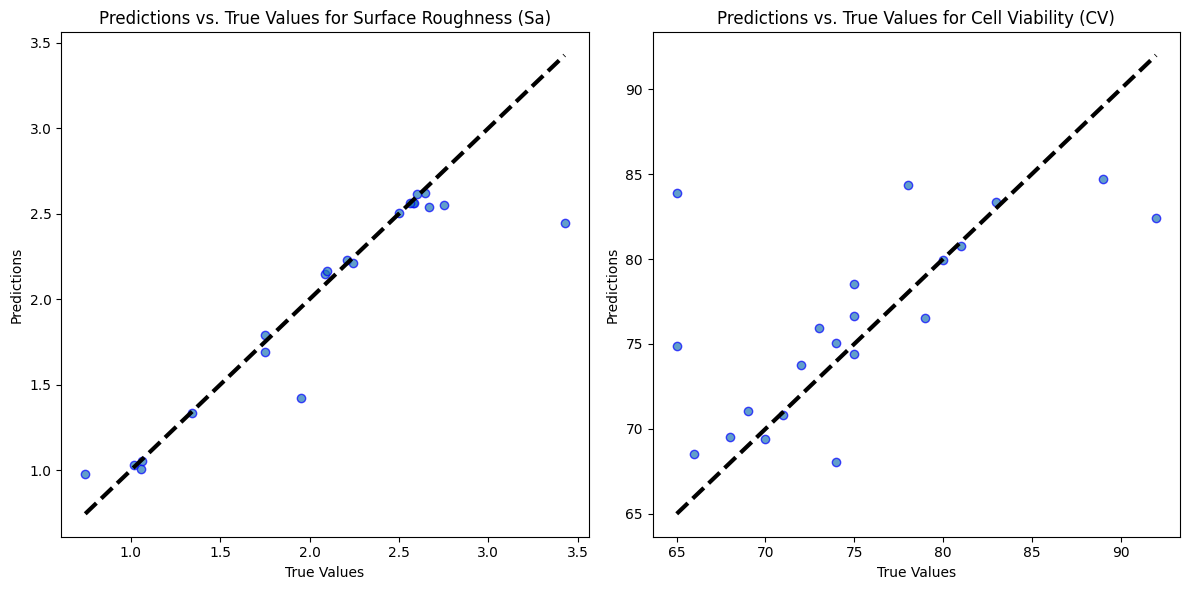

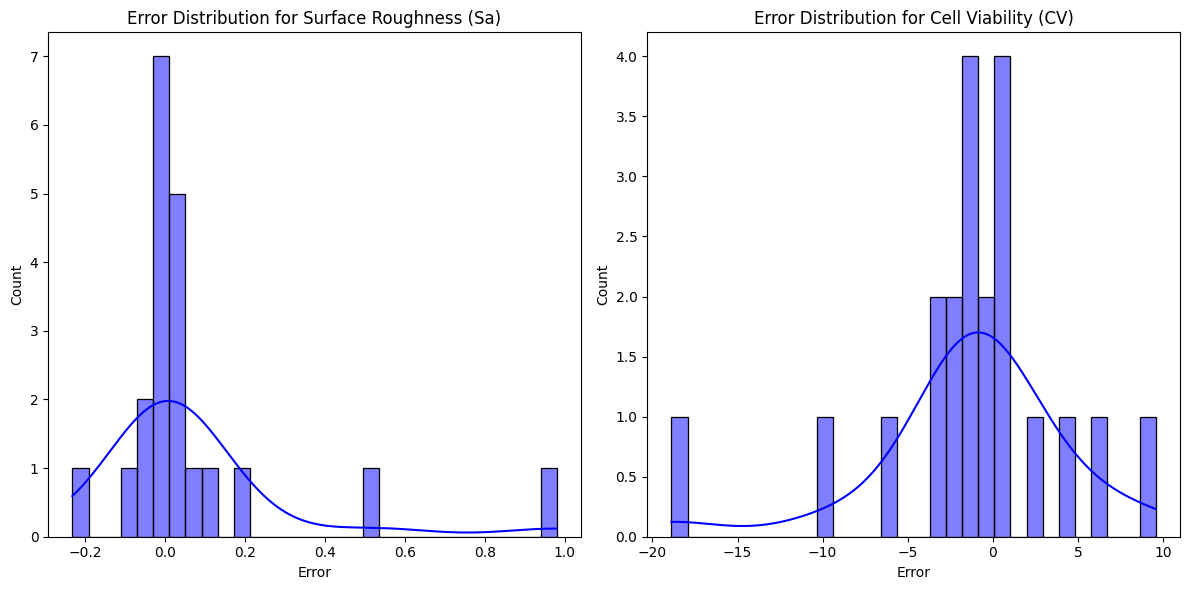

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate the tuned GradientBoosting model on the test set for Surface Roughness (Sa)
y_sa_pred_best_gb = best_gb_sa.predict(X_test_sa)

# Calculate evaluation metrics
test_mae_sa_best_gb = mean_absolute_error(y_sa_test, y_sa_pred_best_gb)
test_rmse_sa_best_gb = np.sqrt(mean_squared_error(y_sa_test, y_sa_pred_best_gb))
test_r2_sa_best_gb = r2_score(y_sa_test, y_sa_pred_best_gb)
test_smape_sa_best_gb = smape(y_sa_test, y_sa_pred_best_gb)

print(f"\nEvaluation of Tuned GradientBoosting Model for Surface Roughness (Sa):")
print(f"Test MAE (Sa): {test_mae_sa_best_gb:.4f}")
print(f"Test RMSE (Sa): {test_rmse_sa_best_gb:.4f}")
print(f"Test R2 (Sa): {test_r2_sa_best_gb:.4f}")
print(f"Test SMAPE (Sa): {test_smape_sa_best_gb:.4f}")

# Evaluate the tuned RandomForest model on the test set for Cell Viability (CV)
y_cv_pred_best_rf = best_rf_cv.predict(X_test_cv)

# Calculate evaluation metrics
test_mae_cv_best_rf = mean_absolute_error(y_cv_test, y_cv_pred_best_rf)
test_rmse_cv_best_rf = np.sqrt(mean_squared_error(y_cv_test, y_cv_pred_best_rf))
test_r2_cv_best_rf = r2_score(y_cv_test, y_cv_pred_best_rf)
test_smape_cv_best_rf = smape(y_cv_test, y_cv_pred_best_rf)

print(f"\nEvaluation of Tuned RandomForest Model for Cell Viability (CV):")
print(f"Test MAE (CV): {test_mae_cv_best_rf:.4f}")
print(f"Test RMSE (CV): {test_rmse_cv_best_rf:.4f}")
print(f"Test R2 (CV): {test_r2_cv_best_rf:.4f}")
print(f"Test SMAPE (CV): {test_smape_cv_best_rf:.4f}")

# Visualize Predictions vs. True Values

plt.figure(figsize=(12, 6))

# Predictions vs. True Values for Surface Roughness (Sa)
plt.subplot(1, 2, 1)
plt.scatter(y_sa_test, y_sa_pred_best_gb, alpha=0.7, edgecolors='b')
plt.plot([y_sa_test.min(), y_sa_test.max()], [y_sa_test.min(), y_sa_test.max()], 'k--', lw=3)
plt.title("Predictions vs. True Values for Surface Roughness (Sa)")
plt.xlabel("True Values")
plt.ylabel("Predictions")

# Predictions vs. True Values for Cell Viability (CV)
plt.subplot(1, 2, 2)
plt.scatter(y_cv_test, y_cv_pred_best_rf, alpha=0.7, edgecolors='b')
plt.plot([y_cv_test.min(), y_cv_test.max()], [y_cv_test.min(), y_cv_test.max()], 'k--', lw=3)
plt.title("Predictions vs. True Values for Cell Viability (CV)")
plt.xlabel("True Values")
plt.ylabel("Predictions")

plt.tight_layout()
plt.show()

# Visualize Error Distributions

plt.figure(figsize=(12, 6))

# Error Distribution for Surface Roughness (Sa)
plt.subplot(1, 2, 1)
sns.histplot(y_sa_test - y_sa_pred_best_gb, kde=True, bins=30, color='blue')
plt.title("Error Distribution for Surface Roughness (Sa)")
plt.xlabel("Error")

# Error Distribution for Cell Viability (CV)
plt.subplot(1, 2, 2)
sns.histplot(y_cv_test - y_cv_pred_best_rf, kde=True, bins=30, color='blue')
plt.title("Error Distribution for Cell Viability (CV)")
plt.xlabel("Error")

plt.tight_layout()
plt.show()


### 8. Predictions  :
- Surface Roughness and Cell Viability directly in the prediction function.

In [12]:
import pandas as pd

# Assume we have a new dataset for prediction
# Example new data (Replace with actual new data or load from a file)
new_data = pd.DataFrame({
    'Angle of Sandblasting': [35, 40, 45],
    'Pressure of Sandblasting (bar)': [4, 3, 5],
    'Temperture of Acid Etching': [50, 60, 45],
    'Time of Acid Etching (min)': [7, 5, 9],
    'Voltage of Anodizing (v)': [100, 90, 110],
    'Time of  Anodizing (min)': [8, 6, 7]
})

# Preprocess the new data
# Apply PolynomialFeatures (same as during training)
X_new_poly = poly.transform(new_data)

# Standardize the features (same as during training)
X_new_scaled = scaler.transform(X_new_poly)

# Apply the same feature selection used during training
X_new_selected_sa = X_new_scaled[:, selected_features_sa]  # For Surface Roughness (Sa)
X_new_selected_cv = X_new_scaled[:, selected_features_cv]  # For Cell Viability (CV)

# Make predictions for Surface Roughness (Sa)
sa_predictions = best_gb_sa.predict(X_new_selected_sa)

# Make predictions for Cell Viability (CV)
cv_predictions = best_rf_cv.predict(X_new_selected_cv)

# Create a DataFrame to store the predictions
predictions_df = new_data.copy()
predictions_df['Predicted Surface Roughness (Sa)'] = sa_predictions
predictions_df['Predicted Cell Viability (%)'] = cv_predictions

# Apply post-processing if needed
# For example, apply the validation rules you used earlier for setting "Cell Viability (%)" to 0 if Sa is outside the valid range
predictions_df.loc[(predictions_df['Predicted Surface Roughness (Sa)'] <= 1.5) | 
                   (predictions_df['Predicted Surface Roughness (Sa)'] >= 2.5), 
                   'Predicted Cell Viability (%)'] = 0

# Print the predictions
print("Predictions on new data:")
print(predictions_df)

Predictions on new data:
   Angle of Sandblasting  Pressure of Sandblasting (bar)  \
0                     35                               4   
1                     40                               3   
2                     45                               5   

   Temperture of Acid Etching  Time of Acid Etching (min)  \
0                          50                           7   
1                          60                           5   
2                          45                           9   

   Voltage of Anodizing (v)  Time of  Anodizing (min)  \
0                       100                         8   
1                        90                         6   
2                       110                         7   

   Predicted Surface Roughness (Sa)  Predicted Cell Viability (%)  
0                          2.071370                     77.643676  
1                          1.437109                      0.000000  
2                          3.047513                     